**1. Import des bibliothèques de base**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


**2. Chargement du dataset Meteo**

In [31]:
df = pd.read_csv("C:/Users/kefuz/Desktop/Wether_data/Data_merge/data/processed/meteo_global.csv", encoding='latin1')
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", errors='coerce')
df.head()

,ville,date,temperature,pressure,humidity,wind_speed,wind_degree,clouds
0,Buenos Aires,2025-06-25,7.98,1014.0,62,5.14,320,0
1,Dubai,2025-06-25,37.96,993.0,44,5.66,310,0
2,Johannesburg,2025-06-25,17.14,1016.0,45,0.89,60,0
3,Lagos,2025-06-25,29.32,1012.0,70,3.24,217,100
4,London,2025-06-25,25.63,1012.0,56,2.24,125,100


**3. Aperçu général du dataset**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15336 entries, 0 to 15335
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ville        15336 non-null  object        
 1   date         15336 non-null  datetime64[ns]
 2   temperature  15336 non-null  float64       
 3   pressure     15336 non-null  float64       
 4   humidity     15336 non-null  int64         
 5   wind_speed   15336 non-null  float64       
 6   wind_degree  15336 non-null  int64         
 7   clouds       15336 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 958.6+ KB


In [26]:
df.describe()

,date,temperature,pressure,humidity,wind_speed,wind_degree,clouds
count,15336,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000,15336.000000
mean,2023-10-01 11:56:37.183098368,17.579849,989.196981,71.042254,12.412361,190.584637,53.464202
min,2022-01-01 00:00:00,-12.000000,824.200000,9.000000,0.000000,0.000000,0.000000
25%,2022-11-16 00:00:00,12.200000,1000.900000,63.000000,8.800000,107.000000,25.000000
50%,2023-10-01 12:00:00,17.800000,1008.900000,74.000000,11.500000,206.000000,56.000000
75%,2024-08-16 00:00:00,22.800000,1013.900000,82.000000,15.200000,266.000000,83.000000
max,2025-07-01 00:00:00,39.500000,1041.200000,99.000000,51.000000,360.000000,100.000000
std,NaN,7.701768,52.351312,14.521555,5.146511,101.434128,32.685527


**4. Vérification des types de colonnes et des valeurs uniques**

In [19]:
df.dtypes

ville                  object
date           datetime64[ns]
temperature           float64
pressure              float64
humidity                int64
wind_speed            float64
wind_degree             int64
clouds                  int64
dtype: object

**5. Détection de données manquantes et doublons**

In [10]:
print("Valeurs manquantes par colonne :\n", df.isnull().sum())
print("Nombre de doublons :", df.duplicated().sum())

Valeurs manquantes par colonne :
 ville          0
date           0
temperature    0
pressure       0
humidity       0
wind_speed     0
wind_degree    0
clouds         0
dtype: int64
Nombre de doublons : 0


**Nombres d'enregistrements**

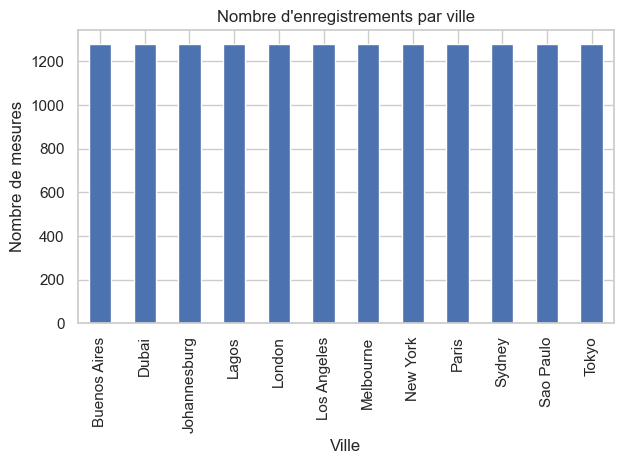

In [32]:
ville_counts = df['ville'].value_counts()
ville_counts.plot(kind='bar', title='Nombre d\'enregistrements par ville')
plt.xlabel('Ville')
plt.ylabel('Nombre de mesures')
plt.tight_layout()
plt.show()

**Distribution de la temperature**

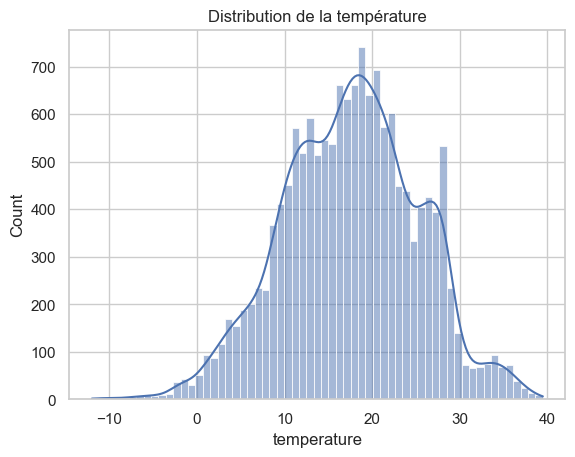

In [33]:
sns.histplot(df['temperature'], kde=True)
plt.title('Distribution de la température')
plt.show()

**Distribution de pression, humidite, vent, nuages**

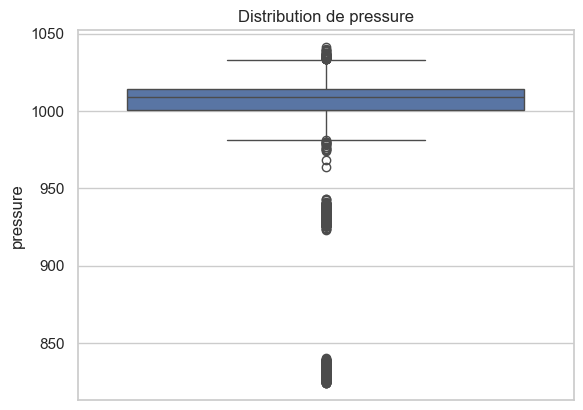

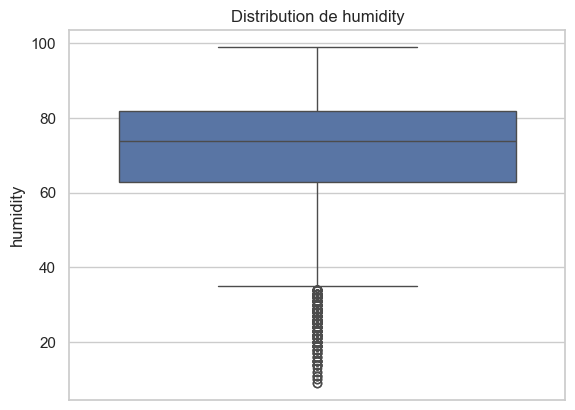

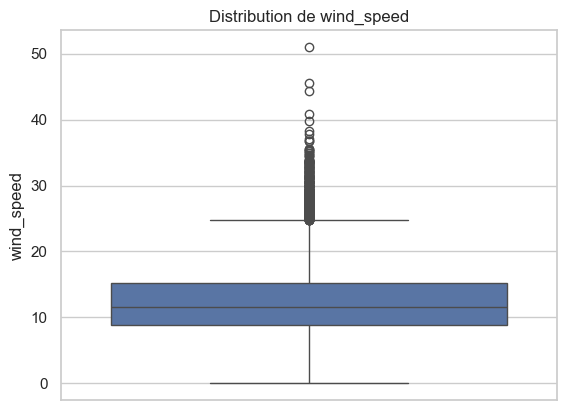

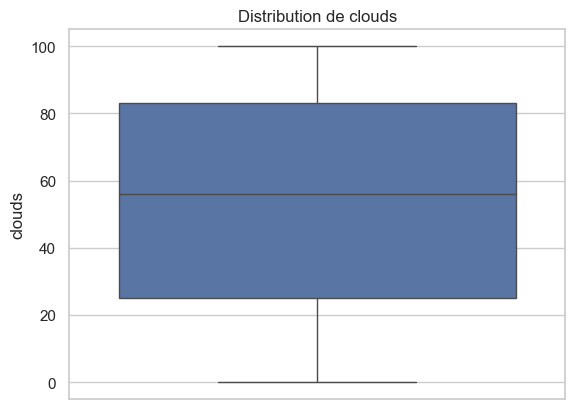

In [35]:
variables = ['pressure', 'humidity', 'wind_speed', 'clouds']
for var in variables:
    sns.boxplot(y=df[var])
    plt.title(f'Distribution de {var}')
    plt.show()

**Temperature moyenne dans le temps**

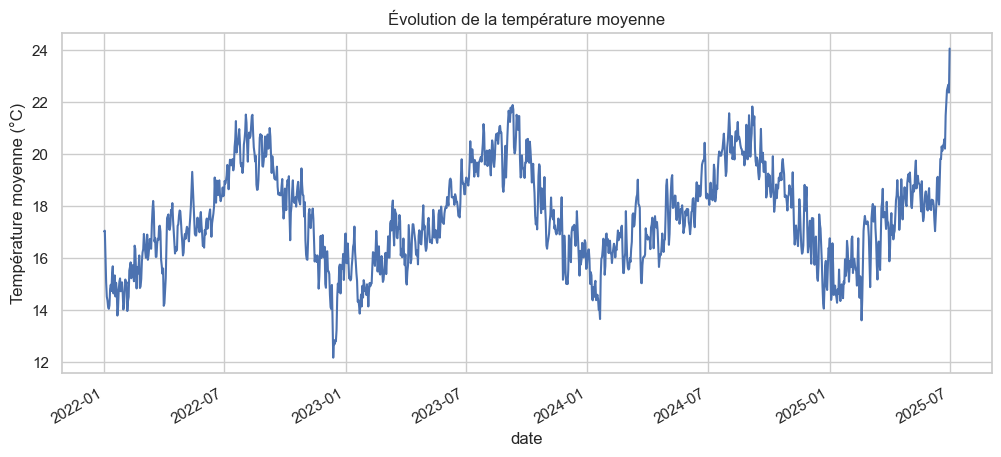

In [37]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.groupby('date')['temperature'].mean().plot(figsize=(12,5), title='Évolution de la température moyenne')
plt.ylabel('Température moyenne (°C)')
plt.show()

**Temperature et humidite par ville**

<Axes: xlabel='ville'>

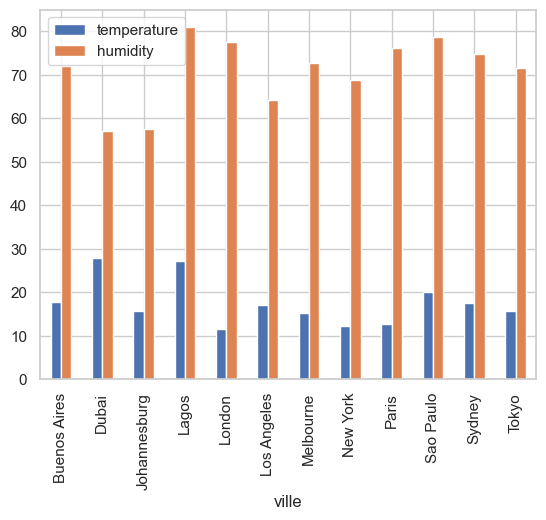

In [39]:
df.groupby('ville')[['temperature', 'humidity']].mean().plot(kind='bar')

**Corrélations notables**

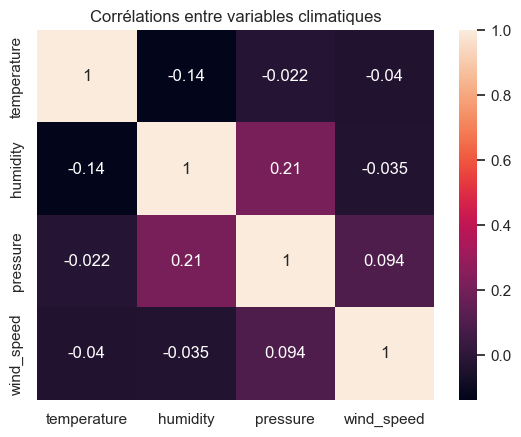

In [40]:
sns.heatmap(df[['temperature', 'humidity', 'pressure', 'wind_speed']].corr(), annot=True)
plt.title('Corrélations entre variables climatiques')
plt.show()